Data Read Section

In [2]:
import pandas as pd

dataset = pd.read_csv('dataset_sdn.csv')
dataset.head(5)

,dt,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,...,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
0,11425,1,10.0.0.1,10.0.0.8,45304,48294064,100,716000000,1.010000e+11,3,...,451,0,UDP,3,143928631,3917,0,0.0,0.0,0
1,11605,1,10.0.0.1,10.0.0.8,126395,134737070,280,734000000,2.810000e+11,2,...,451,0,UDP,4,3842,3520,0,0.0,0.0,0
2,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,1,3795,1242,0,0.0,0.0,0
3,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,2,3688,1492,0,0.0,0.0,0
4,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,3,3413,3665,0,0.0,0.0,0


Data Preprocessing

Dataset summarization

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104345 entries, 0 to 104344
Data columns (total 23 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   dt           104345 non-null  int64  
 1   switch       104345 non-null  int64  
 2   src          104345 non-null  object 
 3   dst          104345 non-null  object 
 4   pktcount     104345 non-null  int64  
 5   bytecount    104345 non-null  int64  
 6   dur          104345 non-null  int64  
 7   dur_nsec     104345 non-null  int64  
 8   tot_dur      104345 non-null  float64
 9   flows        104345 non-null  int64  
 10  packetins    104345 non-null  int64  
 11  pktperflow   104345 non-null  int64  
 12  byteperflow  104345 non-null  int64  
 13  pktrate      104345 non-null  int64  
 14  Pairflow     104345 non-null  int64  
 15  Protocol     104345 non-null  object 
 16  port_no      104345 non-null  int64  
 17  tx_bytes     104345 non-null  int64  
 18  rx_bytes     104345 non-

Statistics of the dataset

In [4]:
dataset.describe()

,dt,switch,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,packetins,pktperflow,byteperflow,pktrate,Pairflow,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
count,104345.000000,104345.000000,104345.000000,1.043450e+05,104345.000000,1.043450e+05,1.043450e+05,104345.000000,104345.000000,104345.000000,1.043450e+05,104345.000000,104345.000000,104345.000000,1.043450e+05,1.043450e+05,104345.000000,103839.000000,103839.000000,104345.000000
mean,17927.514169,4.214260,52860.954746,3.818660e+07,321.497398,4.613880e+08,3.218865e+11,5.654234,5200.383468,6381.715291,4.716150e+06,212.210676,0.600987,2.331094,9.325264e+07,9.328039e+07,998.899756,1003.811420,2007.578742,0.390857
std,11977.642655,1.956327,52023.241460,4.877748e+07,283.518232,2.770019e+08,2.834029e+11,2.950036,5257.001450,7404.777808,7.560116e+06,246.855123,0.489698,1.084333,1.519380e+08,1.330004e+08,2423.471618,2054.887034,3144.437173,0.487945
min,2488.000000,1.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,2.000000,4.000000,-130933.000000,-1.464426e+08,-4365.000000,0.000000,1.000000,2.527000e+03,8.560000e+02,0.000000,0.000000,0.000000,0.000000
25%,7098.000000,3.000000,808.000000,7.957600e+04,127.000000,2.340000e+08,1.270000e+11,3.000000,1943.000000,29.000000,2.842000e+03,0.000000,0.000000,1.000000,4.743000e+03,3.539000e+03,0.000000,0.000000,0.000000,0.000000
50%,11905.000000,4.000000,42828.000000,6.471930e+06,251.000000,4.180000e+08,2.520000e+11,5.000000,3024.000000,8305.000000,5.521680e+05,276.000000,1.000000,2.000000,4.219610e+06,1.338339e+07,0.000000,0.000000,4.000000,0.000000
75%,29952.000000,5.000000,94796.000000,7.620354e+07,412.000000,7.030000e+08,4.130000e+11,7.000000,7462.000000,10017.000000,9.728112e+06,333.000000,1.000000,3.000000,1.356398e+08,1.439277e+08,251.000000,557.000000,3838.000000,1.000000
max,42935.000000,10.000000,260006.000000,1.471280e+08,1881.000000,9.990000e+08,1.880000e+12,17.000000,25224.000000,19190.000000,1.495387e+07,639.000000,1.000000,5.000000,1.269982e+09,9.905962e+08,20580.000000,16577.000000,20580.000000,1.000000


Delete rows with null values

In [5]:
dataset.dropna(inplace=True)

Distribution of Target Class

In [6]:
malign_data = dataset[dataset['label'] == 1]
benign_data = dataset[dataset['label'] == 0]

malign_percentage = round((len(malign_data)/dataset.shape[0])*100,2)
benign_percentage = round((len(benign_data)/dataset.shape[0])*100,2)

print('Percentage of DDOS attacks that has occured :', malign_percentage, '%')
print('Percentage of DDOS attacks that has not occured :', benign_percentage, '%')

Percentage of DDOS attacks that has occured : 39.01 %
Percentage of DDOS attacks that has not occured : 60.99 %


Visualization

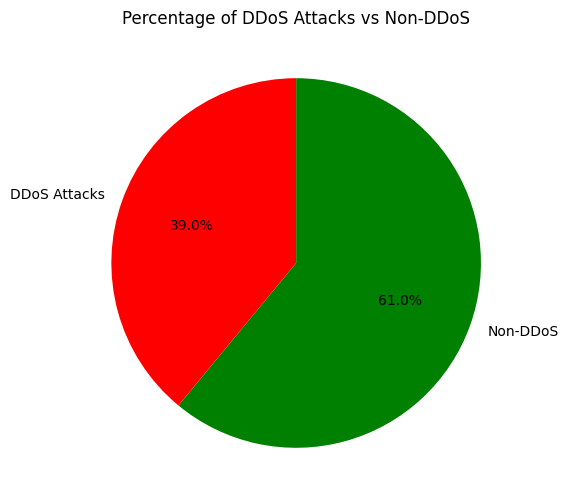

In [7]:
import matplotlib.pyplot as plt

# Yüzde değerleri
labels = ['DDoS Attacks', 'Non-DDoS']
percentages = [malign_percentage, benign_percentage]

# Pasta grafiği
plt.figure(figsize=(6, 6))
plt.pie(percentages, labels=labels, autopct='%1.1f%%', startangle=90, colors=['red', 'green'])
plt.title('Percentage of DDoS Attacks vs Non-DDoS')
plt.show()


Numerical Features

In [8]:
numerical_features = [feature for feature in dataset.columns if dataset[feature].dtypes != 'O']
print("The number of numerical features: ",len(numerical_features),"and they are : \n",numerical_features)

The number of numerical features:  20 and they are : 
 ['dt', 'switch', 'pktcount', 'bytecount', 'dur', 'dur_nsec', 'tot_dur', 'flows', 'packetins', 'pktperflow', 'byteperflow', 'pktrate', 'Pairflow', 'port_no', 'tx_bytes', 'rx_bytes', 'tx_kbps', 'rx_kbps', 'tot_kbps', 'label']


Categorical Features

In [9]:
category_features = [feature for feature in dataset.columns if dataset[feature].dtypes == 'O']
print("The number of categorical features: ",len(category_features),"and they are : \n",category_features)

The number of categorical features:  3 and they are : 
 ['src', 'dst', 'Protocol']


Distribution of protocols for malign attacks

In [10]:
def percentage_malign_protocols():
    arr = [x for x, y in zip(dataset['Protocol'], dataset['label']) if y == 1]
    perc_arr = []
    for i in ['UDP','TCP','ICMP']:
        perc_arr.append(arr.count(i)/len(arr) *100)
    return perc_arr

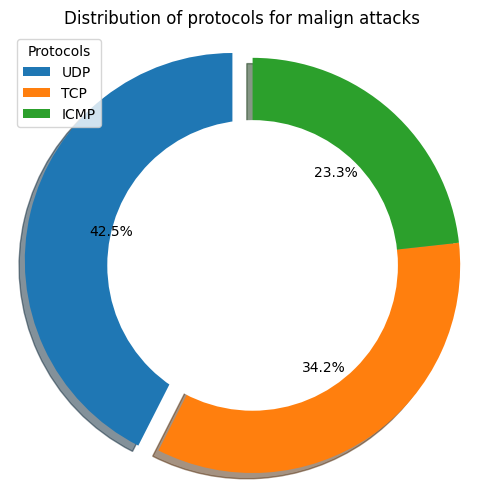

In [11]:
fig, ax = plt.subplots(figsize=(6, 6))
wedges, texts, autotexts = ax.pie(percentage_malign_protocols(), 
                                  explode=(0.1, 0, 0), autopct='%1.1f%%', 
                                  shadow=True, startangle=90)
ax.axis('equal')
ax.legend(wedges, ['UDP', 'TCP', 'ICMP'], title="Protocols", loc="best")
centre_circle = plt.Circle((0, 0), 0.70, fc='white')  # İç kısmı beyaz yap
fig.gca().add_artist(centre_circle)
plt.title('Distribution of protocols for malign attacks')
plt.show()



Heat map of correlation of features

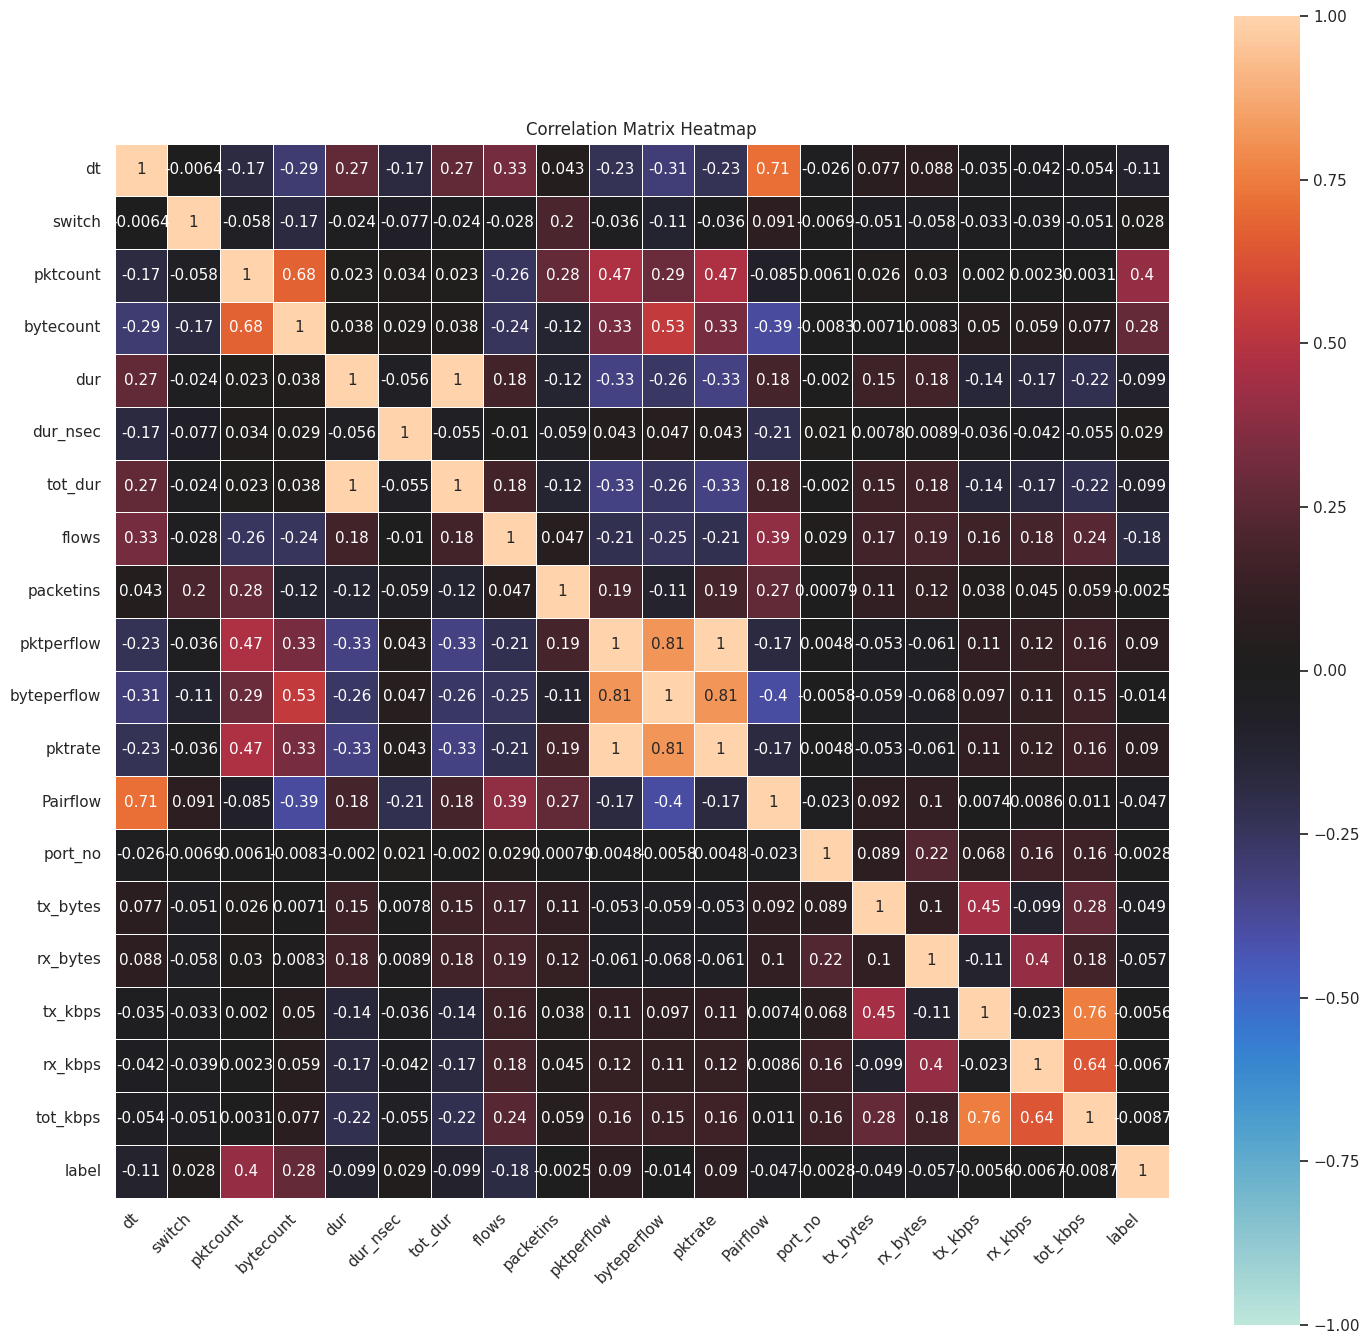

In [12]:
import numpy as np
import seaborn as sns

numerical_df = dataset.select_dtypes(include=['float64', 'int64'])  # Yalnızca sayısal sütunları seç
correlation_matrix = numerical_df.corr()

fig = plt.figure(figsize=(17, 17))
sns.set_theme(style="darkgrid")
ax = sns.heatmap(
    correlation_matrix,
    square=True,
    annot=True,
    center=0,
    vmin=-1,
    linewidths=0.5,
    annot_kws={"size": 11}
)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title("Correlation Matrix Heatmap")
plt.show()


Encoding categorical features

In [13]:
df = pd.get_dummies(dataset, columns=category_features ,drop_first=True)
print("This Dataframe has {} rows and {} columns after encoding".format(df.shape[0], df.shape[1]))
#dataframe after encoding
df.head(10)

This Dataframe has 103839 rows and 57 columns after encoding


,dt,switch,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,packetins,pktperflow,...,dst_10.0.0.2,dst_10.0.0.3,dst_10.0.0.4,dst_10.0.0.5,dst_10.0.0.6,dst_10.0.0.7,dst_10.0.0.8,dst_10.0.0.9,Protocol_TCP,Protocol_UDP
0,11425,1,45304,48294064,100,716000000,1.010000e+11,3,1943,13535,...,False,False,False,False,False,False,True,False,False,True
1,11605,1,126395,134737070,280,734000000,2.810000e+11,2,1943,13531,...,False,False,False,False,False,False,True,False,False,True
2,11425,1,90333,96294978,200,744000000,2.010000e+11,3,1943,13534,...,False,False,False,False,False,False,True,False,False,True
3,11425,1,90333,96294978,200,744000000,2.010000e+11,3,1943,13534,...,False,False,False,False,False,False,True,False,False,True
4,11425,1,90333,96294978,200,744000000,2.010000e+11,3,1943,13534,...,False,False,False,False,False,False,True,False,False,True
5,11425,1,90333,96294978,200,744000000,2.010000e+11,3,1943,13534,...,False,False,False,False,False,False,True,False,False,True
6,11425,1,45304,48294064,100,716000000,1.010000e+11,3,1943,13535,...,False,False,False,False,False,False,True,False,False,True
7,11425,1,45304,48294064,100,716000000,1.010000e+11,3,1943,13535,...,False,False,False,False,False,False,True,False,False,True
8,11425,1,45304,48294064,100,716000000,1.010000e+11,3,1943,13535,...,False,False,False,False,False,False,True,False,False,True
9,11425,1,90333,96294978,200,744000000,2.010000e+11,3,1943,13534,...,False,False,False,False,False,False,True,False,False,True


Independent and Dependent Variables

In [14]:
#separating input and output attributes
x = df.drop(['label'], axis=1)
y = df['label']

Normalizing

In [15]:
from sklearn.preprocessing import MinMaxScaler

ms = MinMaxScaler()
x = ms.fit_transform(x)

Split to Test and Train (%75 - %25)

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.3)
print(X_train.shape, X_test.shape)

(72687, 56) (31152, 56)


K-Nearest Neighbor Classifier

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
Classifier_accuracy = []

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)
y_pred = knn_clf.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
Classifier_accuracy.append(accuracy*100)
print("Accuracy of KNN Classifier : %.2f" % (accuracy*100))

Accuracy of KNN Classifier : 96.37


SVM Classifier

In [18]:
from sklearn.svm import SVC

svc_clf = SVC() 
svc_clf.fit(X_train,y_train)
y_pred = svc_clf.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
Classifier_accuracy.append(accuracy*100)
print("Accuracy of SVM Classifier : %.2f" % (accuracy*100) )

Accuracy of SVM Classifier : 97.25


Decision Tree Classifier

In [20]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(max_depth=5)
dt_clf.fit(X_train,y_train)
y_pred = dt_clf.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
Classifier_accuracy.append(accuracy*100)
print("Accuracy of Decision Tree Classifier : %.2f" % (accuracy*100) )

Accuracy of Decision Tree Classifier : 96.37


RandomForest Classifier

In [21]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)

rf_clf.fit(X_train, y_train)

y_pred = rf_clf.predict(X_test)

accuracy = metrics.accuracy_score(y_test, y_pred)

Classifier_accuracy.append(accuracy * 100)

print("Accuracy of Random Forest Classifier: %.2f" % (accuracy * 100))

Accuracy of Random Forest Classifier: 97.16


Naive Bayes Classifier

In [22]:
from sklearn.naive_bayes import CategoricalNB

nb_clf = CategoricalNB()
nb_clf.fit(X_train,y_train)
y_pred = nb_clf.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
Classifier_accuracy.append(accuracy*100)
print("Accuracy of Naive Bayes Classifier : %.2f" % (accuracy*100) )

Accuracy of Naive Bayes Classifier : 71.31


Quadratic Discriminant Analysis Classifier

In [24]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.decomposition import PCA

pca = PCA(n_components=min(X_train.shape[1], len(np.unique(y_train)) - 1))  # Özellik sayısını azalt
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

qda_clf=QuadraticDiscriminantAnalysis()
qda_clf.fit(X_train_pca, y_train)
y_pred=qda_clf.predict(X_test_pca)
accuracy = metrics.accuracy_score(y_test, y_pred)
Classifier_accuracy.append(accuracy*100)
print("Accuracy of QDA Classifier : %.2f" % (accuracy*100))

Accuracy of QDA Classifier : 62.48


Stochastic Gradient Classifier

In [25]:
from sklearn.linear_model import SGDClassifier

sgd_clf=SGDClassifier(loss="hinge", penalty="l2")
sgd_clf.fit(X_train,y_train)
y_pred=sgd_clf.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
Classifier_accuracy.append(accuracy*100)
print("Accuracy of SGD Classifier : %.2f" % (accuracy*100))

Accuracy of SGD Classifier : 83.10


Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(max_iter=1000)
lr_clf.fit(X_train,y_train)
y_pred=lr_clf.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
Classifier_accuracy.append(accuracy*100)
print("Accuracy of Logistic Regression Classifier : %.2f" % (accuracy*100))

Accuracy of Logistic Regression Classifier : 83.80


XGBoost Classifier

In [ ]:
import xgboost as xgb

xgb_clf=xgb.XGBClassifier(eval_metric = 'error',objective='binary:logistic',max_depth=2, learning_rate=0.1)
xgb_clf.fit(X_train,y_train)
y_pred=xgb_clf.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
Classifier_accuracy.append(accuracy*100)
print("Accuracy of XGBoost Classifier : %.2f" % (accuracy*100))